<a href="https://colab.research.google.com/github/Sasanika/NLP_sentiment_analysis/blob/main/NLP_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import wordcloud


In [3]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
def remove_pattern(input_txt, pattern):
    return re.sub(pattern, "", input_txt)

df['clean_tweet'] = df['tweet'].apply(lambda x: remove_pattern(x, "@[\w]*"))


In [6]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z\s]", "")

In [9]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet') # Download the WordNet corpus

import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 3 and word not in stop_words]
    return " ".join(words)

df['clean_tweet'] = df['clean_tweet'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


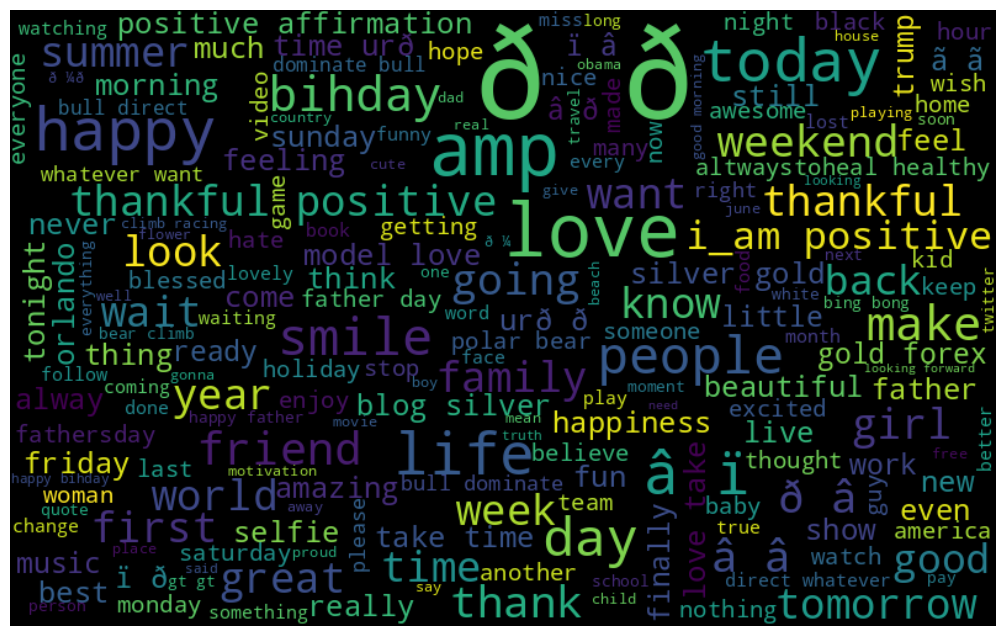

In [11]:
!pip install wordcloud
from wordcloud import WordCloud

all_words = " ".join(df['clean_tweet'])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

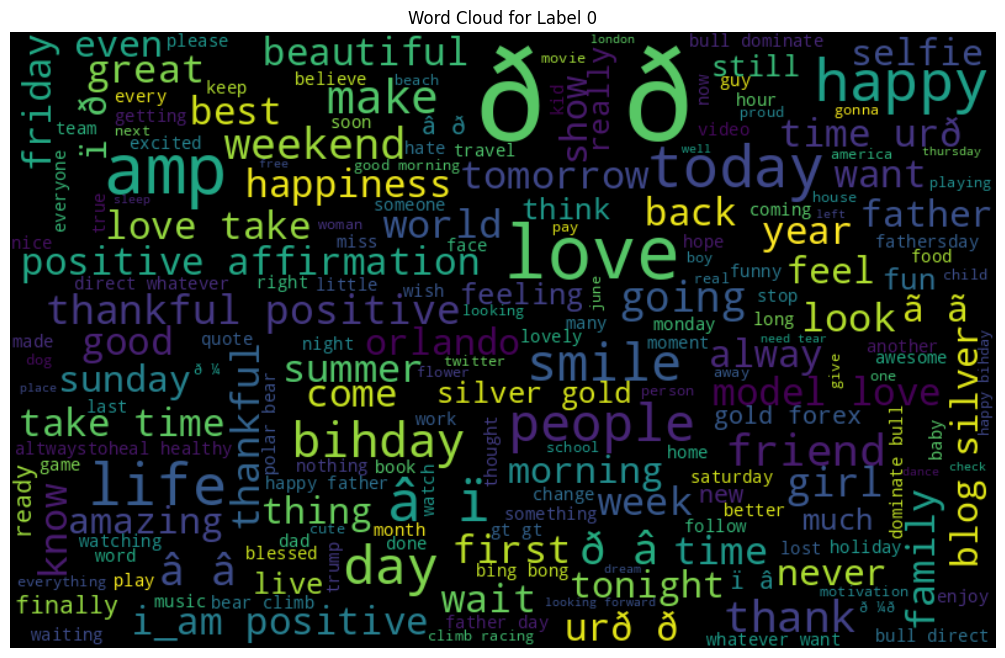

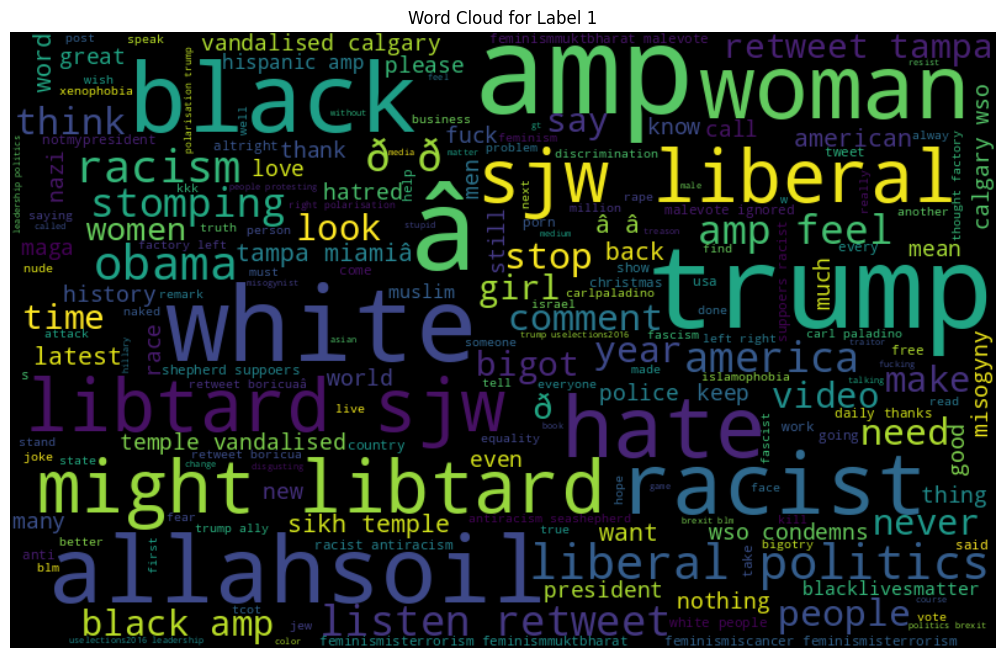

In [12]:
for label in [0, 1]:
    all_words = " ".join(df[df['label'] == label]['clean_tweet'])
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label {label}')
    plt.axis('off')
    plt.show()


In [14]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
X = tfidf_vectorizer.fit_transform(df['clean_tweet'])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.25, random_state=42)


In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report and confusion matrix:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classification Report and confusion matrix:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.80      0.31      0.45       559

    accuracy                           0.95      7991
   macro avg       0.87      0.65      0.71      7991
weighted avg       0.94      0.95      0.94      7991

[[7387   45]
 [ 383  176]]


In [21]:
y_pred_svc = svc_model.predict(X_test)
print("SVC Classification Report and confusion matrix:")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

SVC Classification Report and confusion matrix:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.79      0.33      0.47       559

    accuracy                           0.95      7991
   macro avg       0.87      0.66      0.72      7991
weighted avg       0.94      0.95      0.94      7991

[[7382   50]
 [ 373  186]]


In [22]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report and confusion matrix:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report and confusion matrix:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.74      0.43      0.54       559

    accuracy                           0.95      7991
   macro avg       0.85      0.71      0.76      7991
weighted avg       0.94      0.95      0.94      7991

[[7347   85]
 [ 320  239]]


In [23]:
def preprocess_input(tweet):
    tweet = remove_pattern(tweet, "@[\w]*")
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)
    tweet = " ".join([lemmatizer.lemmatize(word) for word in tweet.split() if len(word) > 3 and word not in stop_words])
    return tweet

# Example tweet
tweet = "I hate this person! #racism"

# Preprocess the tweet
preprocessed_tweet = preprocess_input(tweet)

In [24]:
# Transform the preprocessed tweet
tweet_vector = tfidf_vectorizer.transform([preprocessed_tweet])

In [25]:
# Predict using Logistic Regression
prediction_lr = lr_model.predict(tweet_vector)
prob_lr = lr_model.predict_proba(tweet_vector)  # Get probability scores

# Predict using SVC
prediction_svc = svc_model.predict(tweet_vector)
prob_svc = svc_model.predict_proba(tweet_vector)  # Get probability scores

# Predict using Random Forest
prediction_rf = rf_model.predict(tweet_vector)
prob_rf = rf_model.predict_proba(tweet_vector)  # Get probability scores


In [26]:
print(f"Logistic Regression Prediction: {'Hate Speech' if prediction_lr[0] == 1 else 'Not Hate Speech'}")
print(f"Logistic Regression Probability: {prob_lr[0]}")

print(f"SVC Prediction: {'Hate Speech' if prediction_svc[0] == 1 else 'Not Hate Speech'}")
print(f"SVC Probability: {prob_svc[0]}")

print(f"Random Forest Prediction: {'Hate Speech' if prediction_rf[0] == 1 else 'Not Hate Speech'}")
print(f"Random Forest Probability: {prob_rf[0]}")

Logistic Regression Prediction: Hate Speech
Logistic Regression Probability: [0.1152262 0.8847738]
SVC Prediction: Hate Speech
SVC Probability: [0.01358248 0.98641752]
Random Forest Prediction: Hate Speech
Random Forest Probability: [0.12 0.88]


In [27]:
# Adjust the threshold
threshold = 0.3
prediction_lr_adjusted = (prob_lr[:, 1] >= threshold).astype(int)